In [1]:
# Install required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

In [2]:
# Read the two files
df1 = pd.read_csv('/content/hfm_10cols.csv')
df2 = pd.read_csv('/content/hfm_14cols.csv')
df3 = df2.drop(columns = ['Unnamed: 14','Unnamed: 15','label','time'])
df = pd.concat([df1,df3], axis=1)
df = df[['time','failure_label','sensor_1','sensor_2','sensor_3','sensor_4','sensor_5','sensor_6','sensor_7','sensor_8','sensor_9','sensor_10','sensor_11','sensor_12','sensor_13','sensor_14','sensor_15','sensor_16','sensor_17','sensor_18','sensor_19','sensor_20']]
df['time'] = pd.to_datetime(df['time'])

In [3]:
# Based on summary statistics dropping the sensor 4,5,9,15,17 and 18
df = df.drop(columns = ['sensor_4','sensor_5','sensor_9','sensor_15','sensor_17','sensor_18'])
df_normal = df[df['failure_label']==0]
df_failure = df[df['failure_label']==1]
# Train and test data
X_train = df_normal.iloc[:,2:]
X_fault = df_failure.iloc[:,2:]
# Scaling the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_fault)

In [4]:
# Define the number of clusters
k = 1

# Fit k-means clustering model
kmeans = KMeans(n_clusters=k).fit(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
# Function to calculate the Distance of Fault free data from centre
def distanceFromCenter(cluster_center,X):
    p_dist=[]
    for i in range(len(X)):
        dist= pairwise_distances(cluster_center, X[i].reshape(1, -1))
        p_dist.append(dist)
    return np.array(p_dist).reshape(-1)

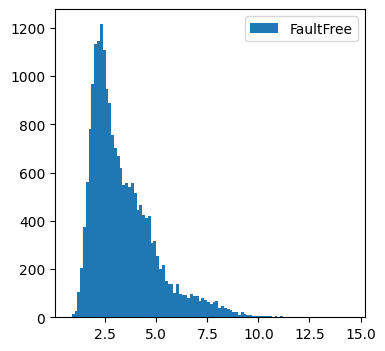

In [6]:
# Histogram for the reconstruction loss of the Fault Free data
Training_reconstruction_loss=distanceFromCenter(cluster_center=kmeans.cluster_centers_,X=X_train_scaled)

plt.rcParams['figure.figsize'] = [4, 4]
plt.hist(Training_reconstruction_loss, bins=100,label='FaultFree',alpha=1)
plt.legend()
plt.show()

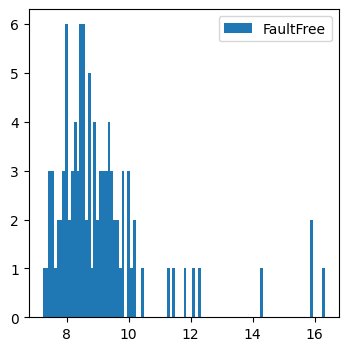

In [7]:
# Histogram for the reconstruction loss of the Faulty data
faulty_dist = distanceFromCenter(cluster_center=kmeans.cluster_centers_,X=X_test_scaled)
plt.rcParams['figure.figsize'] = [4, 4]
plt.hist(faulty_dist, bins=100,label='FaultFree',alpha=1)
plt.legend()
plt.show()

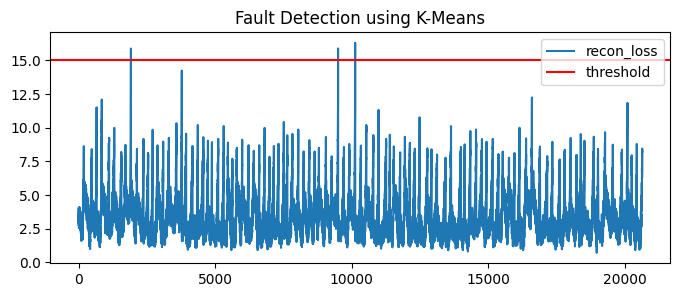

In [8]:
# Fault detection using residuals for the entire data using threshold
threshold = math.ceil(max(Training_reconstruction_loss))
EntireData = df.iloc[:,2:]
EntireData_scaled = sc.transform(EntireData)
EntireData_reconstruction_loss = distanceFromCenter(cluster_center=kmeans.cluster_centers_,X=EntireData_scaled)

plt.rcParams['figure.figsize'] = [8, 3]
plt.plot(EntireData_reconstruction_loss,label=f'recon_loss')
plt.axhline(threshold,c='r',label='threshold')    #threshold value

plt.title(f'Fault Detection using K-Means')
plt.legend()
plt.show()

In [9]:
# Counting number of samples above threshold
mask = np.array(EntireData_reconstruction_loss) >= threshold
count_true = np.sum(mask)
indices = np.where(mask)
selected_rows = df.iloc[indices]
selected_rows.shape[0]

3

In [11]:
# Counting number of faults detected by model
(selected_rows.shape[0]-(sum(selected_rows['failure_label'] == 0)))

3

In [12]:
Accuarcy = (selected_rows.shape[0]-(sum(selected_rows['failure_label'] == 0))) / selected_rows.shape[0]
Accuarcy

1.0